<a href="https://colab.research.google.com/github/LiamDuero03/DS-Society-Project/blob/main/2-Preliminary-EDA/Preliminary-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Preliminary EDA & Visualization
Goal: Understand the "shape" and "health" of the data.

In [14]:
# --- LFS SETUP & REPO CLONING ---
import os
import pandas as pd

# 1. Install Git LFS in the Colab environment
!git lfs install

# 2. Clone the repository (This pulls the LFS pointers)
REPO_NAME = "DS-Society-Project"
REPO_URL = f"https://github.com/LiamDuero03/{REPO_NAME}.git"

if not os.path.exists(REPO_NAME):
    !git clone {REPO_URL}
else:
    print("✅ Repository already cloned.")

# 3. Explicitly pull the LFS data (This replaces pointers with actual CSV data)
%cd {REPO_NAME}
!git lfs pull
%cd ..

# --- 4. READ THE DATA ---
# Now we point to the LOCAL folder inside Colab, not the web URL
cities_path = f"/content/{REPO_NAME}/1-Data-Sourcing/all_cities_raw.csv"
weather_path = f"/content/{REPO_NAME}/1-Data-Sourcing/live_weather_data.csv"

raw_data = pd.read_csv(cities_path, low_memory=False)
live_weather_df = pd.read_csv(weather_path)

print(f"✅ Success! Cities Shape: {raw_data.shape}")
print(f"✅ Success! Weather Shape: {live_weather_df.shape}")

Git LFS initialized.
Cloning into 'DS-Society-Project'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 128 (delta 53), reused 50 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (128/128), 1.37 MiB | 9.78 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/DS-Society-Project
/content
✅ Success! Cities Shape: (5000, 4)
✅ Success! Weather Shape: (492, 7)


## 2.1 Understanding the "Skeleton" (Structure)
First, we use basic Pandas commands to see what we are working with. You should always start here to check for missing values or unexpected data types.

In [17]:
# --- CITY DATA INSPECTION ---
print(f"🏙️ Cities Dataset Dimensions: {raw_data.shape}")

# info() shows us non-null counts and memory usage
print("\n--- City Data Structure ---")
raw_data.info()

# Check the coordinates—important for mapping later!
print("\n--- Geographical Range ---")
print(f"Latitude Range: {raw_data['Latitude'].min()} to {raw_data['Latitude'].max()}")
print(f"Longitude Range: {raw_data['Longitude'].min()} to {raw_data['Longitude'].max()}")

🏙️ Cities Dataset Dimensions: (5000, 4)

--- City Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        5000 non-null   object 
 1   Population  5000 non-null   float64
 2   Latitude    5000 non-null   float64
 3   Longitude   5000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 156.4+ KB

--- Geographical Range ---
Latitude Range: -53.15 to 69.3535
Longitude Range: -157.8583333 to 176.166667


In [18]:
# --- WEATHER DATA INSPECTION ---
print(f"🌡️ Weather Dataset Dimensions: {live_weather_df.shape}")

# Statistics for Temperature, Humidity, and Wind
print("\n--- Numerical Statistics (Weather) ---")
display(live_weather_df.describe())

# Categorical check: What are the most common conditions?
print("\n--- Sky Conditions Summary ---")
print(live_weather_df['condition'].value_counts())

🌡️ Weather Dataset Dimensions: (492, 7)

--- Numerical Statistics (Weather) ---


,temp,feels_like,humidity,pressure,wind
count,492.000000,492.000000,492.000000,492.000000,492.000000
mean,13.214370,12.063618,66.819106,1017.063008,3.398191
std,13.896821,15.910123,21.708535,9.007922,2.187702
min,-23.930000,-30.460000,6.000000,994.000000,0.000000
25%,3.507500,0.137500,53.750000,1012.000000,1.897500
50%,15.070000,14.130000,70.000000,1016.000000,3.015000
75%,25.302500,25.742500,83.000000,1021.000000,4.640000
max,38.650000,39.950000,100.000000,1042.000000,12.520000



--- Sky Conditions Summary ---
condition
overcast clouds                 139
clear sky                       115
broken clouds                    64
scattered clouds                 45
few clouds                       36
haze                             30
light rain                       16
mist                             15
fog                               6
light snow                        6
snow                              5
smoke                             5
moderate rain                     4
thunderstorm                      2
light intensity shower rain       1
sand                              1
thunderstorm with light rain      1
light rain and snow               1
Name: count, dtype: int64


## 2.2 Merging Our Datasets
To analyze how weather relates to population, we need to combine our two separate tables into one **Master DataFrame**.



### Why this logic?
* **Standardizing:** Computers see "London" and "london " (with a space) as different places. We use `.str.lower().str.strip()` to make the names identical so they match perfectly.
* **The "Inner" Merge:** This keeps only the cities that appear in **both** lists. Since we only have weather for ~50 cities, this filters our millions of rows down to a focused dataset.
* **Renaming for Speed:** We rename `Population` to `pop` simply to make it faster to type during our visualization steps!

In [23]:
# --- THE CORRECTED MERGE STEP ---

# 1. Standardize the keys
# Use .str.lower().str.strip() to ensure both operations are applied to the text
raw_data['city_match'] = raw_data['City'].str.lower().str.strip()
live_weather_df['city_match'] = live_weather_df['city_name'].str.lower().str.strip()

# 2. Perform the Merge
# Using 'raw_data' (your city list) and 'live_weather_df'
master_df = pd.merge(
    live_weather_df,
    raw_data[['city_match', 'Population', 'Latitude', 'Longitude']],
    on='city_match',
    how='inner'
)

# 3. Clean up
master_df = master_df.drop(columns=['city_match'])
master_df = master_df.rename(columns={'Population': 'pop'})

print(f"✅ Merge Complete! Final Dataset Dimensions: {master_df.shape}")
master_df.head()

✅ Merge Complete! Final Dataset Dimensions: (528, 10)


,city_name,temp,feels_like,humidity,pressure,condition,wind,pop,Latitude,Longitude
0,tokyo,4.31,4.31,47,1014,light rain,0.45,31480498.0,35.685000,139.751389
1,shanghai,7.92,4.27,66,1030,scattered clouds,7.00,14608512.0,31.045556,121.399722
2,bombay,27.99,28.53,51,1013,smoke,3.60,12692717.0,18.975000,72.825833
3,karachi,22.90,21.85,23,1017,overcast clouds,4.12,11627378.0,24.905600,67.082200
4,new delhi,15.09,14.67,77,1018,mist,2.06,10928270.0,28.600000,77.200000


## 2.3 The "Big Picture" Analysis (Pairplots)

Once we know our data is clean, we want to see how different variables interact. Instead of making dozens of individual charts, we use a **Pairplot**. This is a powerful "all-in-one" visualization that helps us spot patterns across the entire dataset instantly.

---

#### What is happening in this visualization?

A Pairplot creates a matrix of charts. To read it like a pro, look at these three distinct areas:

1. **The Diagonal (The Curves):**
Running from the top-left to the bottom-right, you see **Distribution Plots** (KDE). These show you the "shape" of a single variable—for example, where most city temperatures are concentrated.
2. **The Scatter Plots (The Dots):**
Every other square shows the relationship between **two different variables**.
* If the dots form a clear line, the variables are **correlated**.
* If the dots look like a messy cloud, there is **no relationship**.


3. **The Red Regression Lines (`kind='reg'`):**
These lines represent the "best fit" for the data.
* **Sloping Up:** As one value goes up, the other tends to go up (e.g., Humidity vs. Feels Like).
* **Sloping Down:** As one value goes up, the other tends to go down.



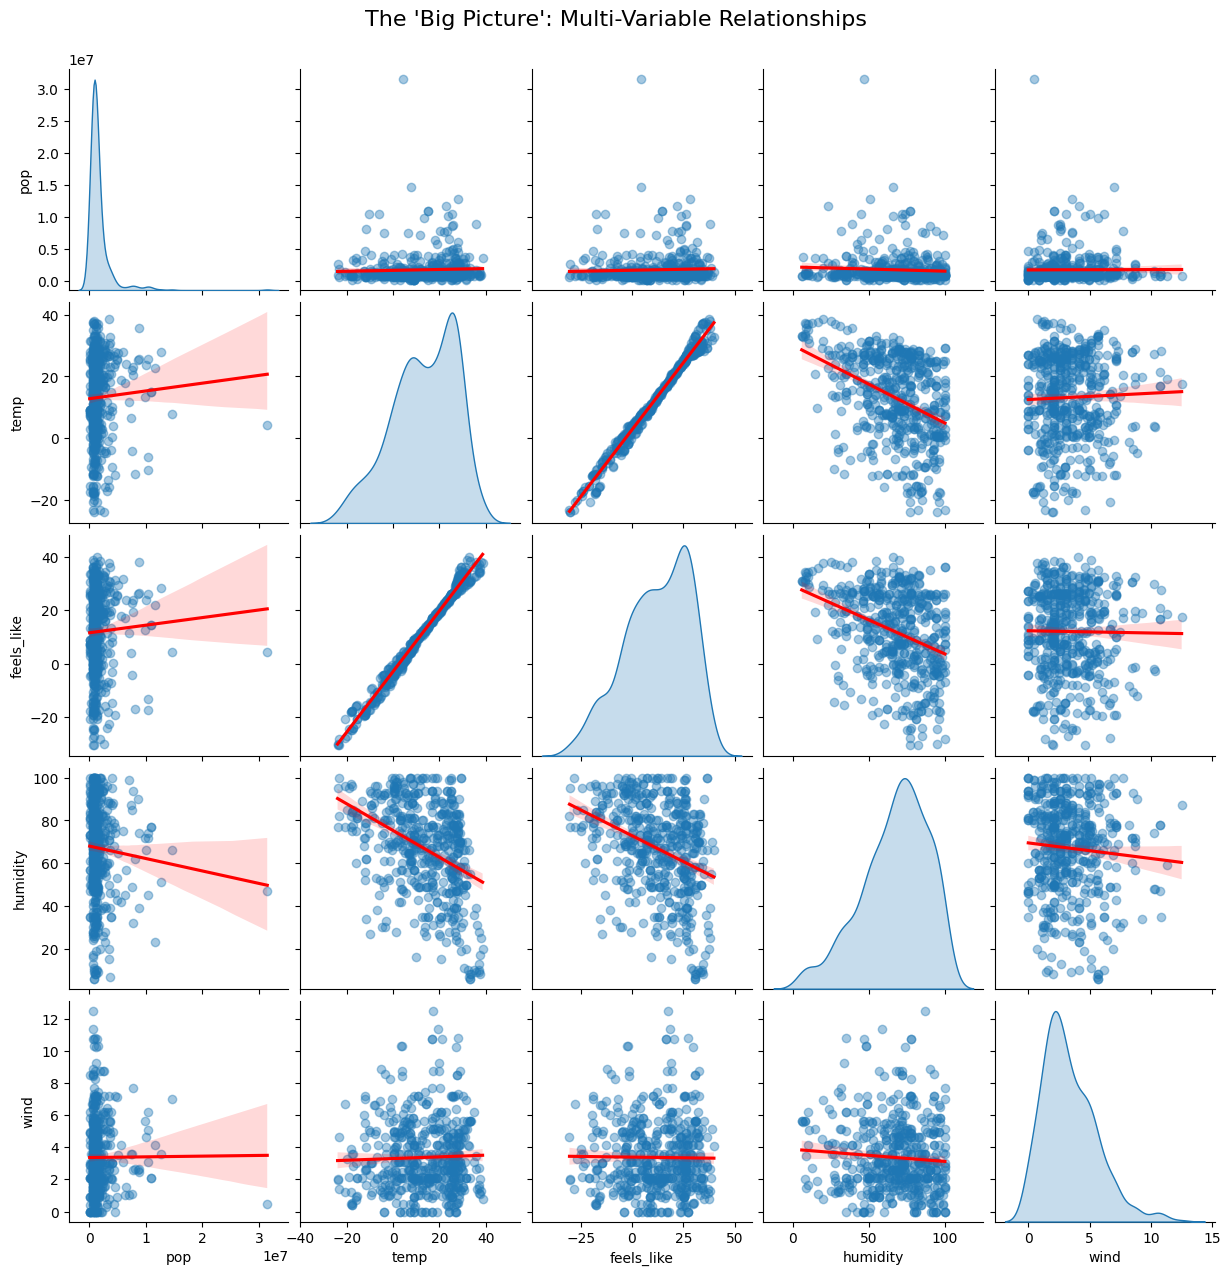

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. We select only the numerical columns that make sense for a beginner to compare
# We exclude lat/lng for now to focus on the 'Weather vs People' story
cols_to_plot = ['pop', 'temp', 'feels_like', 'humidity', 'wind']

# 2. Create the Pairplot
# 'diag_kind' shows the univariate distribution (histogram) on the diagonal
# 'kind=reg' adds a trend line to the scatter plots to show correlations
plot = sns.pairplot(
    master_df[cols_to_plot],
    diag_kind='kde',
    kind='reg',
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
)

# Add a title to the figure
plot.fig.suptitle("The 'Big Picture': Multi-Variable Relationships", y=1.02, fontsize=16)

plt.show()